# 📊 Análisis Exploratorio de Datos (EDA)

En este notebook realizaremos un análisis exploratorio completo de nuestro dataset de sentimientos en redes sociales. Exploraremos la distribución de sentimientos, patrones temporales, plataformas más populares y realizaremos la limpieza necesaria de los datos.

## 🎯 Objetivos:
- Comprender la estructura y calidad del dataset
- Limpiar y preparar los datos
- Visualizar patrones y tendencias
- Identificar insights sobre comportamiento en redes sociales

## 1. Importación de Librerías

In [23]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Librerías para procesamiento de texto
import re
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Colores personalizados para sentimientos
sentiment_colors = {'Positive': '#2E8B57', 'Negative': '#DC143C', 'Neutral': '#4682B4'}

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


## 2. Carga y Exploración Inicial de Datos

In [24]:
# Cargar el dataset
df = pd.read_csv('../data/sentimentdataset.csv')

print("📊 Información general del dataset:")
print(f"- Dimensiones: {df.shape}")
print(f"- Registros: {df.shape[0]:,}")
print(f"- Columnas: {df.shape[1]}")

# Mostrar las primeras filas
print("\n🔍 Primeras 5 filas:")
df.head()

📊 Información general del dataset:
- Dimensiones: (732, 15)
- Registros: 732
- Columnas: 15

🔍 Primeras 5 filas:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [25]:
# Información detallada del dataset
print("📋 Información detallada del dataset:")
df.info()

print("\n📈 Estadísticas descriptivas:")
df.describe(include='all')

📋 Información detallada del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB

📈 Estadísticas descriptivas:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
count,732.000000,732.000000,732,732,732,732,732,732,732.000000,732.000000,732,732.000000,732.000000,732.000000,732.000000
unique,NaN,NaN,707,279,683,685,4,697,NaN,NaN,115,NaN,NaN,NaN,NaN
top,NaN,NaN,"A compassionate rain, tears of empathy fallin...",Positive,2020-01-05 08:45:00,RainNurturer,Instagram,#Compassionate #TearsOfEmpathy,NaN,NaN,USA,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,44,3,3,258,3,NaN,NaN,59,NaN,NaN,NaN,NaN
mean,366.464481,369.740437,NaN,NaN,NaN,NaN,NaN,NaN,21.508197,42.901639,NaN,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,NaN,NaN,NaN,NaN,NaN,NaN,7.061286,14.089848,NaN,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,10.000000,NaN,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,NaN,NaN,NaN,NaN,NaN,NaN,17.750000,34.750000,NaN,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,43.000000,NaN,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,50.000000,NaN,2023.000000,9.000000,22.000000,19.000000


## 3. Limpieza y Preprocesamiento de Datos

In [26]:
# Verificar valores faltantes
print("🔍 Valores faltantes por columna:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje': missing_percent
})
print(missing_df[missing_df['Valores Faltantes'] > 0])

🔍 Valores faltantes por columna:
Empty DataFrame
Columns: [Valores Faltantes, Porcentaje]
Index: []


In [27]:
# Crear una copia para trabajar
df_clean = df.copy()

# Eliminar columnas innecesarias
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop('Unnamed: 0', axis=1)

# Limpiar espacios en blanco en columnas de texto
text_columns = ['Text', 'Sentiment', 'User', 'Platform', 'Hashtags', 'Country']
for col in text_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].str.strip()

# Convertir timestamp a datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Verificar valores únicos en la columna de sentimiento
print("😊 Categorías de sentimiento:")
print(df_clean['Sentiment'].value_counts())

print(f"\n✅ Dataset limpio: {df_clean.shape}")

😊 Categorías de sentimiento:
Sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             19
Neutral                 18
                        ..
Celestial Wonder         1
Nature's Beauty          1
Thrilling Journey        1
Whispers of the Past     1
Relief                   1
Name: count, Length: 191, dtype: int64

✅ Dataset limpio: (732, 14)


In [28]:
# Función para limpiar texto
def clean_text(text):
    """Función para limpiar y normalizar texto"""
    if pd.isna(text):
        return text
    
    # Convertir a string y minúsculas
    text = str(text).lower()
    
    # Remover caracteres especiales pero mantener emojis básicos
    text = re.sub(r'[^a-zA-Z0-9\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', '', text)
    
    # Remover espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Aplicar limpieza al texto (crear una nueva columna para conservar el original)
df_clean['Text_Clean'] = df_clean['Text'].apply(clean_text)

print("🧹 Ejemplo de limpieza de texto:")
print(f"Original: {df_clean['Text'].iloc[0]}")
print(f"Limpio: {df_clean['Text_Clean'].iloc[0]}")

🧹 Ejemplo de limpieza de texto:
Original: Enjoying a beautiful day at the park!
Limpio: enjoying a beautiful day at the park


## 4. Análisis Exploratorio de Datos

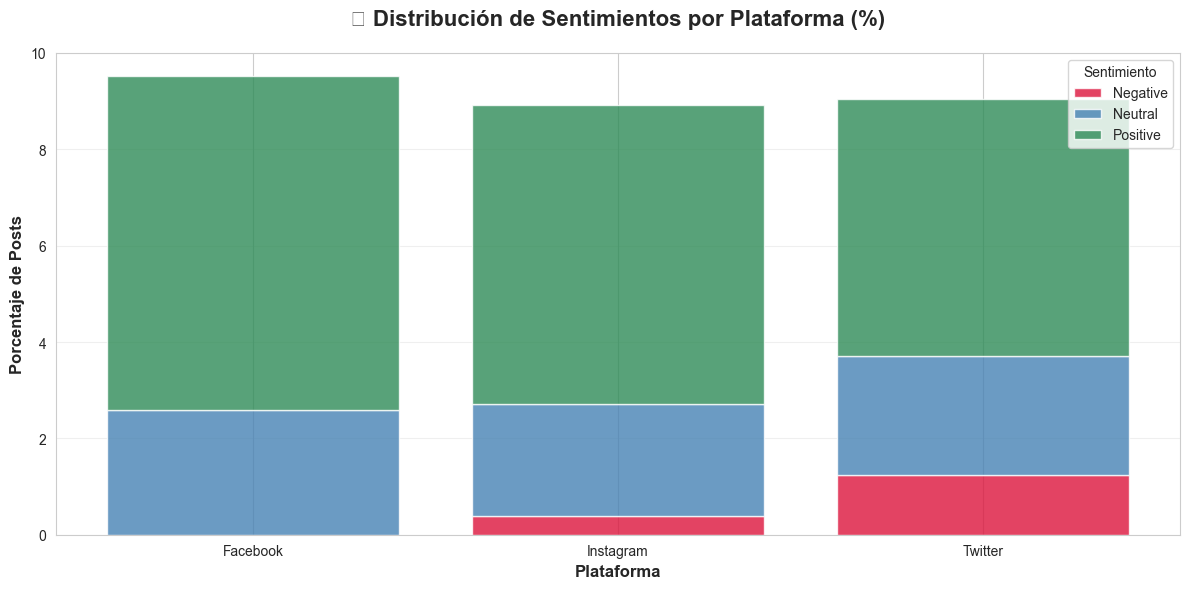

📊 Conteo de posts por plataforma y sentimiento:
Sentiment  Acceptance  Accomplishment  Admiration  Adoration  Adrenaline  \
Platform                                                                   
Facebook            4               3           0          0           1   
Instagram           2               0           2          0           0   
Twitter             2               0           2          2           0   

Sentiment  Adventure  Affection  Amazement  Ambivalence  Amusement  Anger  \
Platform                                                                    
Facebook           0          0          0            2          1      0   
Instagram          0          2          0            2          2      0   
Twitter            3          0          1            2          0      2   

Sentiment  Anticipation  Anxiety  Appreciation  Apprehensive  Arousal  \
Platform                                                                
Facebook              0        1       

In [29]:
# Análisis de sentimientos por plataforma
platform_sentiment = pd.crosstab(df_clean['Platform'], df_clean['Sentiment'], normalize='index') * 100

# Crear gráfico de barras apiladas con matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Crear barras apiladas
bottom = None
for sentiment in ['Negative', 'Neutral', 'Positive']:
    if sentiment in platform_sentiment.columns:
        values = platform_sentiment[sentiment]
        ax.bar(platform_sentiment.index, values, 
               bottom=bottom, 
               label=sentiment, 
               color=sentiment_colors[sentiment], 
               alpha=0.8)
        if bottom is None:
            bottom = values
        else:
            bottom += values

# Personalizar el gráfico
ax.set_title('📱 Distribución de Sentimientos por Plataforma (%)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Plataforma', fontsize=12, fontweight='bold')
ax.set_ylabel('Porcentaje de Posts', fontsize=12, fontweight='bold')
ax.legend(title='Sentimiento', loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar tabla de conteos
print("📊 Conteo de posts por plataforma y sentimiento:")
platform_counts = pd.crosstab(df_clean['Platform'], df_clean['Sentiment'])
print(platform_counts)

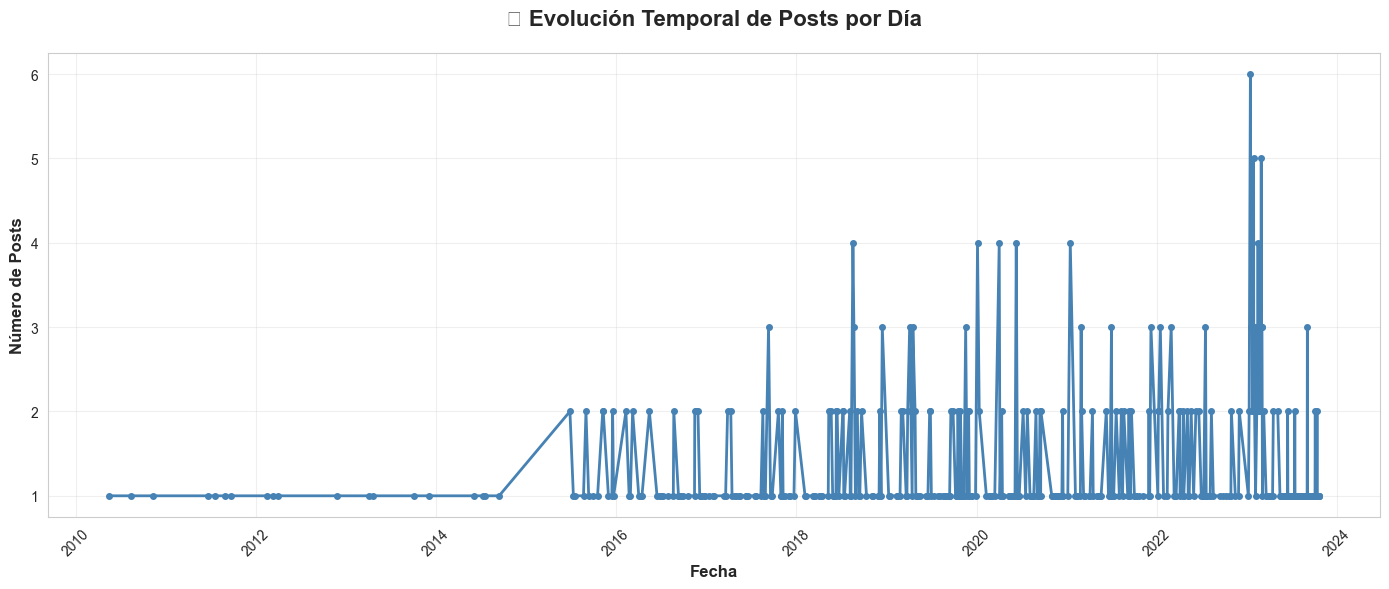

In [30]:
# Análisis temporal - Posts por día
df_clean['Date'] = df_clean['Timestamp'].dt.date
daily_posts = df_clean.groupby('Date').size().reset_index(name='Posts')

# Gráfico de línea temporal con matplotlib
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.plot(daily_posts['Date'], daily_posts['Posts'], marker='o', linewidth=2, markersize=4, color='#4682B4')

# Personalizar el gráfico
ax.set_title('📅 Evolución Temporal de Posts por Día', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Posts', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

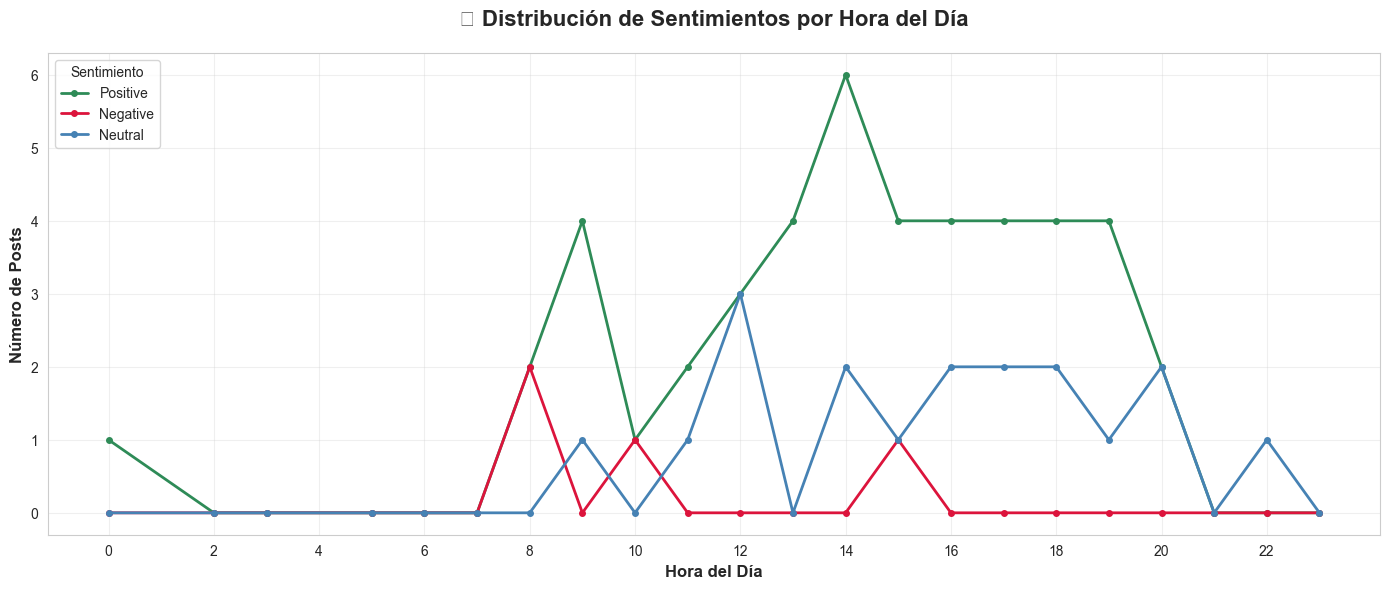

In [31]:
# Análisis por hora del día
hourly_sentiment = df_clean.groupby(['Hour', 'Sentiment']).size().unstack(fill_value=0)

# Crear gráfico de líneas con matplotlib
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Plotear líneas para cada sentimiento
for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in hourly_sentiment.columns:
        ax.plot(hourly_sentiment.index, hourly_sentiment[sentiment], 
               marker='o', linewidth=2, markersize=4, 
               label=sentiment, color=sentiment_colors[sentiment])

# Personalizar el gráfico
ax.set_title('🕐 Distribución de Sentimientos por Hora del Día', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Hora del Día', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Posts', fontsize=12, fontweight='bold')
ax.legend(title='Sentimiento', loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

📊 Mostrando los Top 5 países (de 33 países totales):
  1. USA: 188 posts (25.7%)
  2. UK: 143 posts (19.5%)
  3. Canada: 135 posts (18.4%)
  4. Australia: 75 posts (10.2%)
  5. India: 70 posts (9.6%)


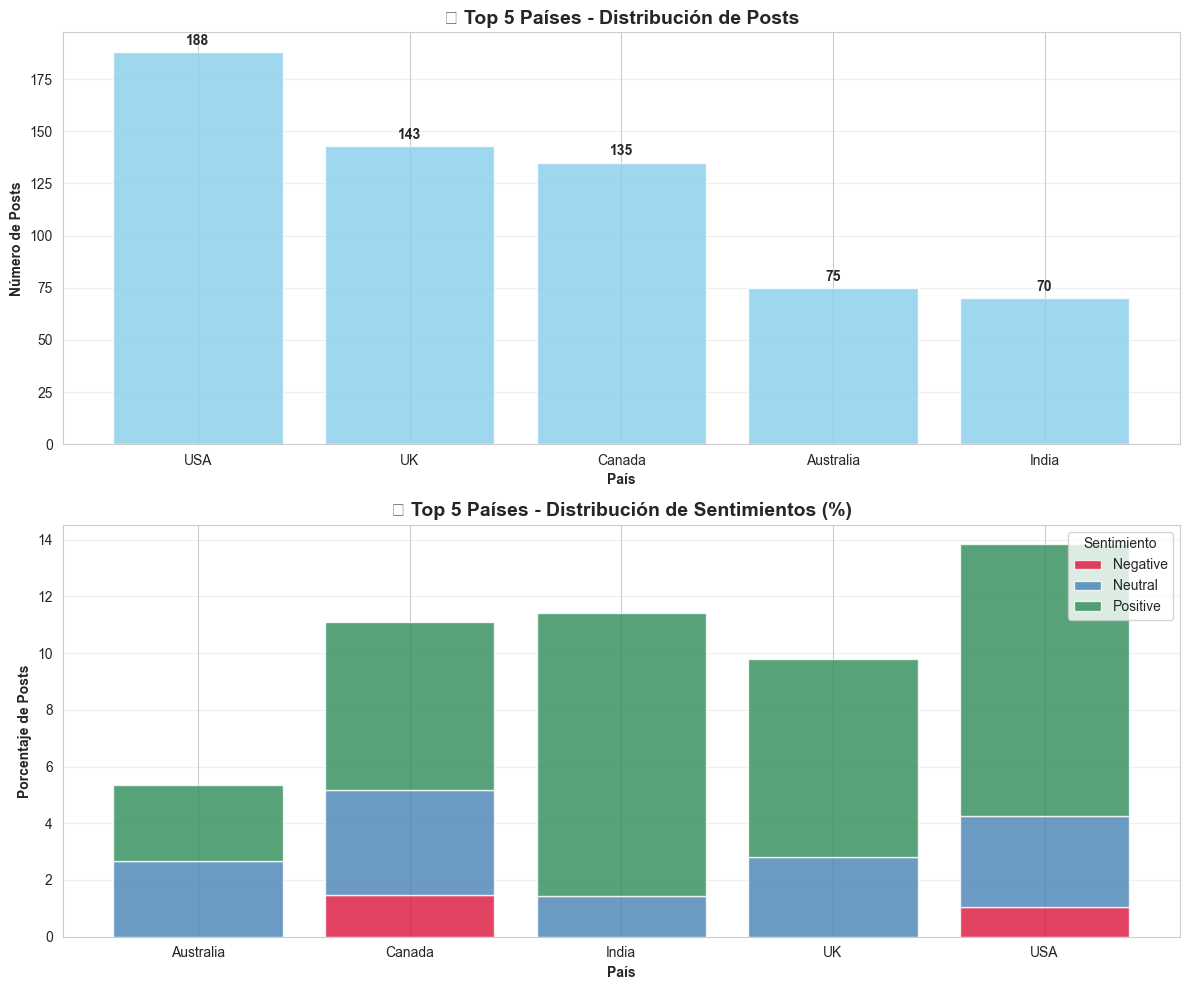


📊 Conteo detallado de sentimientos por país (Top 5):
Sentiment  Acceptance  Accomplishment  Admiration  Adoration  Adventure  \
Country                                                                   
Australia           4               1           0          0          0   
Canada              3               0           0          0          0   
India               0               0           0          0          0   
UK                  1               0           0          2          0   
USA                 0               0           3          0          1   

Sentiment  Affection  Ambivalence  Amusement  Anger  Anticipation  Anxiety  \
Country                                                                      
Australia          0            1          0      0             1        0   
Canada             0            2          1      2             0        0   
India              0            1          0      0             1        0   
UK                 0          

In [32]:
# Distribución por país - Top 5
country_counts = df_clean['Country'].value_counts()
top5_countries = country_counts.head(5)

print(f"📊 Mostrando los Top 5 países (de {len(country_counts)} países totales):")
for i, (country, count) in enumerate(top5_countries.items(), 1):
    percent = (count / len(df_clean) * 100)
    print(f"  {i}. {country}: {count} posts ({percent:.1f}%)")

# Filtrar datos para solo los top 5 países
df_top5_countries = df_clean[df_clean['Country'].isin(top5_countries.index)]

# Gráfico de barras para distribución por país
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico 1: Posts por país (Top 5)
bars1 = ax1.bar(top5_countries.index, top5_countries.values, color='skyblue', alpha=0.8)
ax1.set_title('🌍 Top 5 Países - Distribución de Posts', fontsize=14, fontweight='bold')
ax1.set_xlabel('País', fontweight='bold')
ax1.set_ylabel('Número de Posts', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores encima de las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Análisis de sentimientos por país (Top 5)
country_sentiment_top5 = pd.crosstab(df_top5_countries['Country'], df_top5_countries['Sentiment'], normalize='index') * 100

# Gráfico 2: Sentimientos por país (barras apiladas)
bottom = None
for sentiment in ['Negative', 'Neutral', 'Positive']:
    if sentiment in country_sentiment_top5.columns:
        values = country_sentiment_top5[sentiment]
        ax2.bar(country_sentiment_top5.index, values,
               bottom=bottom,
               label=sentiment,
               color=sentiment_colors[sentiment],
               alpha=0.8)
        if bottom is None:
            bottom = values
        else:
            bottom += values

ax2.set_title('🌎 Top 5 Países - Distribución de Sentimientos (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('País', fontweight='bold')
ax2.set_ylabel('Porcentaje de Posts', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.legend(title='Sentimiento', loc='upper right')

plt.tight_layout()
plt.show()

# Mostrar tabla de conteos para los Top 5
print("\n📊 Conteo detallado de sentimientos por país (Top 5):")
top5_sentiment_counts = pd.crosstab(df_top5_countries['Country'], df_top5_countries['Sentiment'])
print(top5_sentiment_counts)

📏 Estadísticas de longitud de texto por sentimiento:
               Text_Length               Word_Count             
                      mean median    std       mean median   std
Sentiment                                                       
Acceptance           72.50   81.0  19.96      10.62   11.0  2.56
Accomplishment       83.00   84.0  17.52      13.00   13.0  4.00
Admiration           77.25   61.5  37.56      11.50    9.0  5.00
Adoration            48.50   48.5   0.71       8.00    8.0  0.00
Adrenaline           60.00   60.0    NaN       9.00    9.0   NaN
...                    ...    ...    ...        ...    ...   ...
Winter Magic        155.00  155.0    NaN      22.00   22.0   NaN
Wonder               79.33   70.0  20.65      14.00   14.0  3.00
Wonderment           60.00   60.0    NaN      11.00   11.0   NaN
Yearning            117.00  117.0   0.00      21.50   21.5  0.71
Zest                107.00  107.0   9.90      17.50   17.5  0.71

[191 rows x 6 columns]


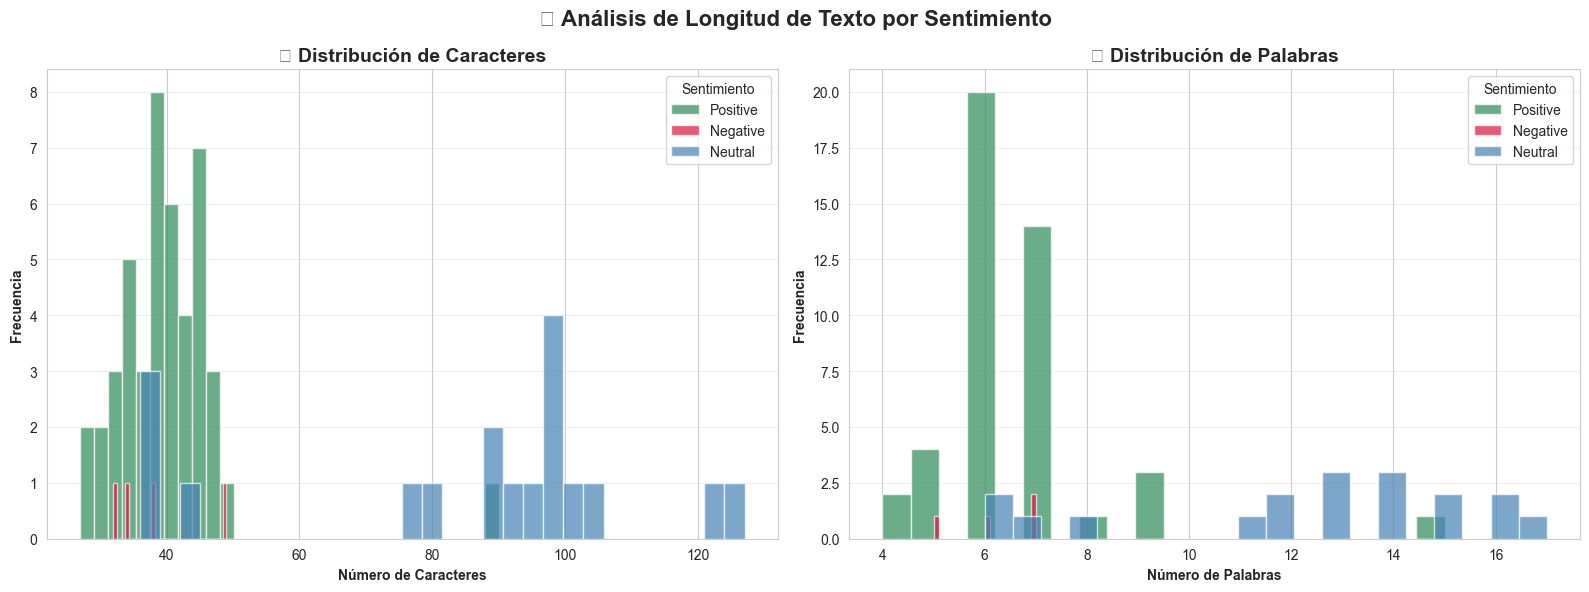

In [33]:
# Calcular longitud de texto
df_clean['Text_Length'] = df_clean['Text'].str.len()
df_clean['Word_Count'] = df_clean['Text'].str.split().str.len()

# Estadísticas de longitud por sentimiento
length_stats = df_clean.groupby('Sentiment')[['Text_Length', 'Word_Count']].agg(['mean', 'median', 'std']).round(2)

print("📏 Estadísticas de longitud de texto por sentimiento:")
print(length_stats)

# Visualización de distribución de longitudes con matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de caracteres
for sentiment in sentiments:
    sentiment_data = df_clean[df_clean['Sentiment'] == sentiment]
    ax1.hist(sentiment_data['Text_Length'], alpha=0.7, bins=30, 
             label=sentiment, color=sentiment_colors[sentiment])

ax1.set_title('📏 Distribución de Caracteres', fontsize=14, fontweight='bold')
ax1.set_xlabel('Número de Caracteres', fontweight='bold')
ax1.set_ylabel('Frecuencia', fontweight='bold')
ax1.legend(title='Sentimiento')
ax1.grid(axis='y', alpha=0.3)

# Histograma de palabras
for sentiment in sentiments:
    sentiment_data = df_clean[df_clean['Sentiment'] == sentiment]
    ax2.hist(sentiment_data['Word_Count'], alpha=0.7, bins=20, 
             label=sentiment, color=sentiment_colors[sentiment])

ax2.set_title('📝 Distribución de Palabras', fontsize=14, fontweight='bold')
ax2.set_xlabel('Número de Palabras', fontweight='bold')
ax2.set_ylabel('Frecuencia', fontweight='bold')
ax2.legend(title='Sentimiento')
ax2.grid(axis='y', alpha=0.3)

fig.suptitle('📊 Análisis de Longitud de Texto por Sentimiento', fontsize=16, fontweight='bold')

plt.tight_layout()

plt.show()

##  Preparación Final del Dataset

In [34]:
# Guardar dataset limpio
df_final = df_clean.copy()

# Eliminar filas con valores faltantes críticos
df_final = df_final.dropna(subset=['Text', 'Sentiment'])

# Reordenar columnas
column_order = ['Text', 'Text_Clean', 'Sentiment', 'Platform', 'Timestamp', 'User', 
                'Hashtags', 'Likes', 'Retweets', 'Country', 'Text_Length', 'Word_Count',
                'Year', 'Month', 'Day', 'Hour', 'Date']

# Solo mantener columnas que existen
existing_columns = [col for col in column_order if col in df_final.columns]
df_final = df_final[existing_columns]

# Guardar dataset procesado
df_final.to_csv('../data/sentiment_data_clean.csv', index=False)

print(f"✅ Dataset final guardado: {df_final.shape}")
print(f"📊 Registros válidos: {len(df_final):,}")
print(f"📈 Distribución final de sentimientos:")
print(df_final['Sentiment'].value_counts())

✅ Dataset final guardado: (732, 17)
📊 Registros válidos: 732
📈 Distribución final de sentimientos:
Sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             19
Neutral                 18
                        ..
Celestial Wonder         1
Nature's Beauty          1
Thrilling Journey        1
Whispers of the Past     1
Relief                   1
Name: count, Length: 191, dtype: int64
